In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# %matplotlib inline
import pmdarima as pm
import csv

In [2]:
from pmdarima.datasets.stocks import load_msft

In [3]:
df = pd.read_csv(r'/Users/zss/Desktop/DRW_Trading/drwvolume/sushan_daily_updated.csv')

In [4]:
mask = df['symbol'] == 'ORCL'

In [5]:
df[mask]

,Unnamed: 0,DATE,SYM_ROOT,total_vol,symbol,CSize,CPrc,OPrc,total_vol_m,total_vol_b,total_vol_a,Ovn_Gap
7,7,2018/12/31,ORCL,12930142,ORCL,1622339,45.15,45.19,14553567,3599.0,376371.0,NaN
1775,1775,2019/01/02,ORCL,10610744,ORCL,2608470,45.22,44.48,13229315,2230.0,1099178.0,-0.67
1776,1776,2019/01/03,ORCL,17912073,ORCL,1240319,44.78,44.84,19141624,17875.0,710170.0,-0.38
1777,1777,2019/01/04,ORCL,16909013,ORCL,2059605,46.71,45.37,19043509,3016.0,1937629.0,0.59
1778,1778,2019/01/07,ORCL,16068852,ORCL,1521264,47.45,46.93,17595416,7.0,377884.0,0.22
...,...,...,...,...,...,...,...,...,...,...,...,...
7568,7568,2021/12/27,ORCL,5058722,ORCL,1233727,89.54,89.70,6294628,27221.0,1349179.0,-0.02
7569,7569,2021/12/28,ORCL,5114949,ORCL,378235,88.65,89.70,5493321,35506.0,85985.0,0.16
7570,7570,2021/12/29,ORCL,4746909,ORCL,707173,88.21,88.50,5454280,7525.0,166873.0,-0.15
7571,7571,2021/12/30,ORCL,6616540,ORCL,516372,88.01,88.65,7137201,75669.0,226534.0,0.44


In [6]:
n = int(len(df[mask]) * 0.8)
train = df[mask][:n]
test = df[mask][n:]

In [7]:
train = train[['DATE','total_vol']]
test = test[['DATE','total_vol']]
train

,DATE,total_vol
7,2018/12/31,12930142
1775,2019/01/02,10610744
1776,2019/01/03,17912073
1777,2019/01/04,16909013
1778,2019/01/07,16068852
...,...,...
7416,2021/05/20,7487949
7417,2021/05/21,6785354
7418,2021/05/24,6172530
7419,2021/05/25,6434179


In [8]:
from pandas.plotting import lag_plot

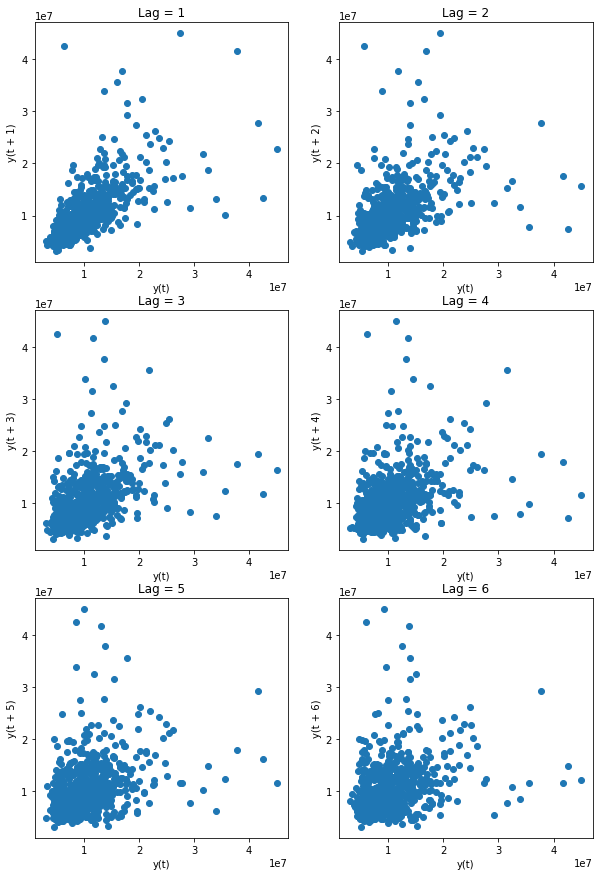

In [9]:
fig, axes = plt.subplots(3, 2, figsize = (10, 15))
plt.title('Autocorrelation plot')
ax_idcs = [
    (0,0),
    (0,1),
    (1,0),
    (1,1),
    (2,0),
    (2,1),
]

for lag, ax_coords in enumerate(ax_idcs, 1):
    ax_row, ax_col = ax_coords
    axis = axes[ax_row][ax_col]
    lag_plot(df[mask]['total_vol'], lag=lag, ax=axis)
    axis.set_title(f"Lag = {lag}")
plt.show()

In [10]:
from pmdarima.arima import ndiffs
kpss_diffs = ndiffs(train.total_vol, alpha = 0.05, test = 'kpss', max_d = 6)
adf_diffs  = ndiffs(train.total_vol, alpha = 0.05, test = 'adf', max_d = 6)
n_diffs = max(adf_diffs, kpss_diffs)
print(f"Estimated differencing term: {n_diffs}")

Estimated differencing term: 0


In [11]:
auto = pm.auto_arima(train.total_vol, d=n_diffs, seasonal=False, stepwise=True, 
                suppress_warning=True,error_action='ignore', max_p=6,
                max_order=None, trace=True)        

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=19988.690, Time=0.51 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=21422.824, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=20049.621, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=21043.587, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=19988.016, Time=0.10 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=20941.168, Time=0.07 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=20004.775, Time=0.07 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=19988.970, Time=0.15 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=20896.220, Time=0.22 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=19987.072, Time=0.47 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=20023.440, Time=0.09 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=19988.916, Time=0.40 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=20002.736, Time=0.10 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=19990.657, Time=0.39 sec
 ARIMA(2,0,1)(0,0,0

In [12]:
print(auto.order)

(2, 0, 2)


In [13]:
from sklearn.metrics import mean_squared_error
from pmdarima.metrics import smape

In [14]:
model = auto
def forecast_one_step():
    fc, conf_int = model.predict(n_periods=1, return_conf_int=True)
    return (
        fc.tolist()[0],
        np.asarray(conf_int).tolist()[0])

forecasts = []
confidence_intervals = []

for new_ob in train.total_vol:
    fc, conf = forecast_one_step()
    forecasts.append(fc)
    confidence_intervals.append(conf)

    # Updates the existing model with a small number of MLE steps
    model.update(new_ob)

print(f"Mean squared error: {mean_squared_error(train.total_vol, forecasts)}")
print(f"SMAPE: {smape(train.total_vol, forecasts)}")

Mean squared error: 12464035633114.402
SMAPE: 20.521013342111328
